
## Classification and Handling Class Imbalance

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv')

In [3]:
# Printing the first five rows
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Data Preprocessing 

In [5]:
# Replace values with No
df = df.replace(['No internet service', 'No phone service'], 'No')
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [6]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in yes_no_columns:
    df[column] = df[column].replace('Yes', 1)
    df[column] = df[column].replace('No', 0)

df['gender'] = df['gender'].replace('Female', 1)
df['gender'] = df['gender'].replace('Male', 0)
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,2,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [1]:
# One hot encoding for categorical columns

df2 = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

NameError: name 'pd' is not defined

In [8]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [9]:
# Train test split
y = df2['Churn']
X = df2.drop(columns='Churn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15, stratify=y_train)

In [10]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## Decision Trees, Logistic Regression, and MLP

In [11]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_val = clf_tree.predict(X_val)
y_pred_test = clf_tree.predict(X_test)

print(f"Score: {clf_tree.score(X_test, y_test)}")
# Confusion Matrix, on validation and test data
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")
print(confusion_matrix(y_pred_test, y_test))

Score: 0.720682302771855
Confusion matrix on validation set
[[658 168]
 [171 128]]
Confusion matrix on test set
[[840 200]
 [193 174]]


In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_Logreg = LogisticRegression()
clf_Logreg = clf_Logreg.fit(X_train, y_train)
y_pred_val = clf_Logreg.predict(X_val)
y_pred_test = clf_Logreg.predict(X_test)

print(f"Score: {clf_Logreg.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")
print(confusion_matrix(y_pred_test, y_test))

Score: 0.7981520966595593
Confusion matrix on validation set
[[733  93]
 [145 154]]
Confusion matrix on test set
[[921 172]
 [112 202]]


In [13]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Using no parameters
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

y_pred_val = clf_mlp.predict(X_val)
y_pred_test = clf_mlp.predict(X_test)

print(f"Score: {clf_mlp.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")

# Using the best parameters after experimentation with gridsearch
clf_best_mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 80), alpha=0.05, solver='lbfgs')
clf_best_mlp.fit(X_train, y_train)

y_pred_val = clf_best_mlp.predict(X_val)
y_pred_test = clf_best_mlp.predict(X_test)

print(f"Best score: {clf_best_mlp.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")
print(confusion_matrix(y_pred_test, y_test))

Score: 0.7555081734186212
Confusion matrix on validation set
[[815  11]
 [270  29]]
Confusion matrix on test set
Best score: 0.8038379530916845
Confusion matrix on validation set
[[712 114]
 [124 175]]
Confusion matrix on test set
[[902 145]
 [131 229]]


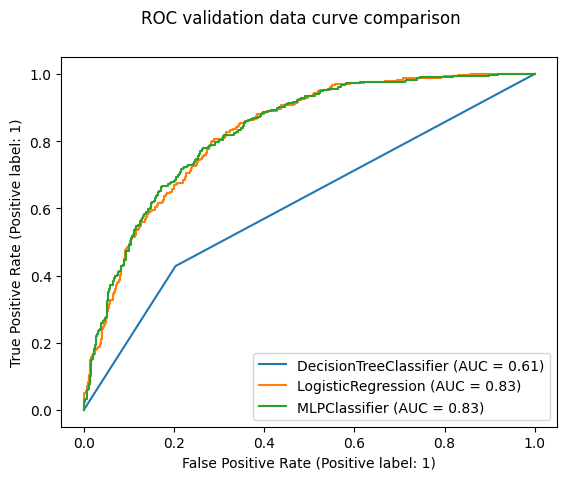

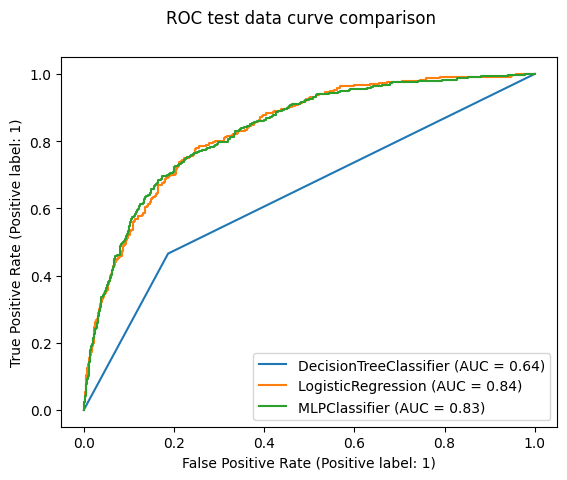

In [14]:
# Plot ROC curves for all classifiers
from sklearn.metrics import plot_roc_curve

tree_val_disp = plot_roc_curve(clf_tree, X_val, y_val)
logreg_val_disp = plot_roc_curve(clf_Logreg, X_val, y_val, ax=tree_val_disp.ax_)
mlp_val_disp = plot_roc_curve(clf_best_mlp, X_val, y_val, ax=logreg_val_disp.ax_)
mlp_val_disp.figure_.suptitle("ROC validation data curve comparison")
plt.show()

tree_test_disp = plot_roc_curve(clf_tree, X_test, y_test)
logreg_test_disp = plot_roc_curve(clf_Logreg, X_test, y_test, ax=tree_test_disp.ax_)
mlp_test_disp = plot_roc_curve(clf_best_mlp, X_test, y_test, ax=logreg_test_disp.ax_)
mlp_test_disp.figure_.suptitle("ROC test data curve comparison")
plt.show()

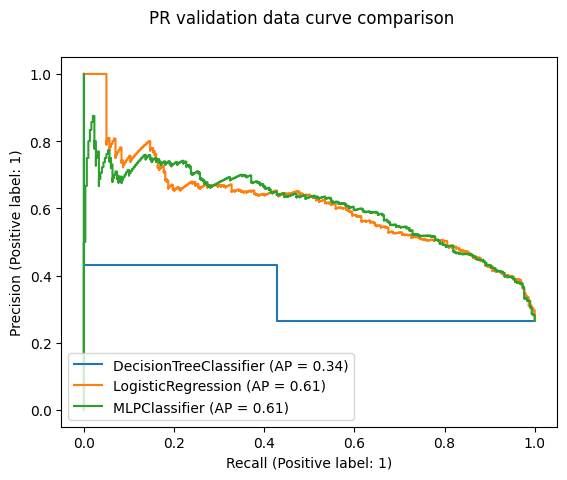

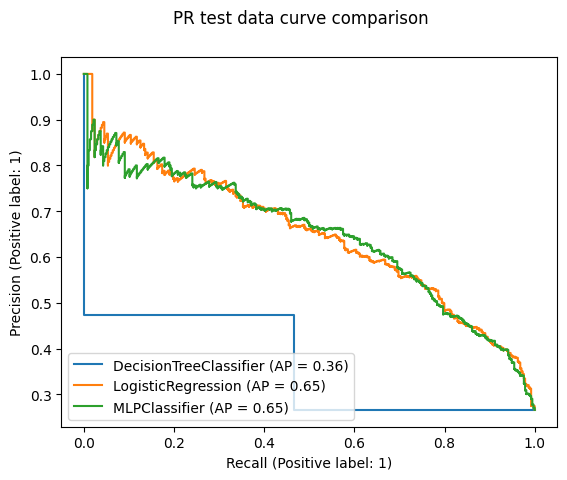

In [15]:
# Plot PR curves
from sklearn.metrics import plot_precision_recall_curve

tree_val_disp = plot_precision_recall_curve(clf_tree, X_val, y_val)
logreg_val_disp = plot_precision_recall_curve(clf_Logreg, X_val, y_val, ax=tree_val_disp.ax_)
mlp_val_disp = plot_precision_recall_curve(clf_best_mlp, X_val, y_val, ax=logreg_val_disp.ax_)
mlp_val_disp.figure_.suptitle("PR validation data curve comparison")
plt.show()

tree_test_disp = plot_precision_recall_curve(clf_tree, X_test, y_test)
logreg_test_disp = plot_precision_recall_curve(clf_Logreg, X_test, y_test, ax=tree_test_disp.ax_)
mlp_test_disp = plot_precision_recall_curve(clf_best_mlp, X_test, y_test, ax=logreg_test_disp.ax_)
mlp_test_disp.figure_.suptitle("PR test data curve comparison")
plt.show()

## Handling Class Imbalance with SMOTE


In [28]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
sm.fit(X, y)
X_res, y_res = sm.fit_resample(X_train, y_train)

orig_vcs = y_train.value_counts()
new_vcs = y_res.value_counts()

print(f"Original value counts: \n {orig_vcs}")
print(f"New value counts: \n {new_vcs}")

Original value counts: 
 0    4130
1    1495
Name: Churn, dtype: int64
New value counts: 
 0    4130
1    4130
Name: Churn, dtype: int64


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=15, stratify=y_res)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=15, stratify=y_train)

In [31]:
# Number of classes in training Data
y_train.value_counts()

1    2643
0    2643
Name: Churn, dtype: int64

In [32]:
# Number of classes in validation Data
y_val.value_counts()

1    826
0    826
Name: Churn, dtype: int64

In [33]:
# Retraining the models
# Logistic Regression
clf_Logreg = LogisticRegression()
clf_Logreg = clf_Logreg.fit(X_train, y_train)
y_pred_val = clf_Logreg.predict(X_val)
y_pred_test = clf_Logreg.predict(X_test)

print(f"Score: {clf_Logreg.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")
print(confusion_matrix(y_pred_test, y_test))

Score: 0.8396369137670197
Confusion matrix on validation set
[[664 162]
 [105 721]]
Confusion matrix on test set
[[542  93]
 [119 568]]


In [34]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Using no parameters
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

y_pred_val = clf_mlp.predict(X_val)
y_pred_test = clf_mlp.predict(X_test)

print(f"Score: {clf_mlp.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")

# Using the best parameters after experimentation
clf_best_mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 80), alpha=0.05, solver='lbfgs')
clf_best_mlp.fit(X_train, y_train)

y_pred_val = clf_best_mlp.predict(X_val)
y_pred_test = clf_best_mlp.predict(X_test)

print(f"Best score: {clf_best_mlp.score(X_test, y_test)}")
print("Confusion matrix on validation set")
print(confusion_matrix(y_val, y_pred_val))
print("Confusion matrix on test set")
print(confusion_matrix(y_pred_test, y_test))

Score: 0.6361573373676248
Confusion matrix on validation set
[[796  30]
 [533 293]]
Confusion matrix on test set
Best score: 0.802571860816944
Confusion matrix on validation set
[[630 196]
 [145 681]]
Confusion matrix on test set
[[522 122]
 [139 539]]


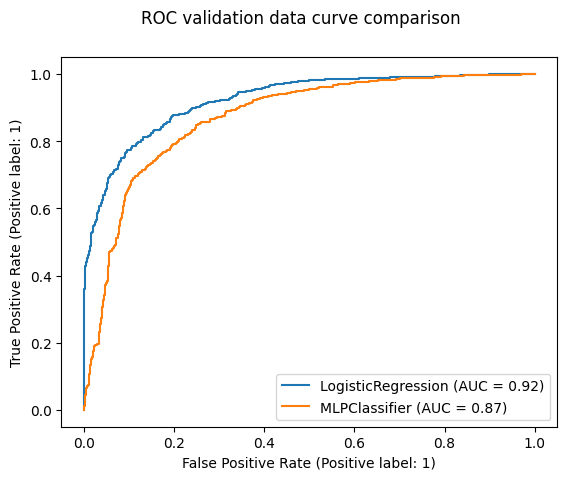

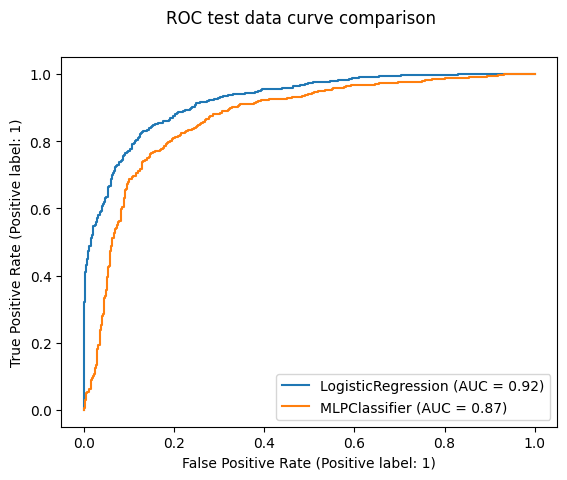

In [35]:
# Plot ROC curves
logreg_val_disp = plot_roc_curve(clf_Logreg, X_val, y_val)
mlp_val_disp = plot_roc_curve(clf_best_mlp, X_val, y_val, ax=logreg_val_disp.ax_)
mlp_val_disp.figure_.suptitle("ROC validation data curve comparison")
plt.show()

logreg_test_disp = plot_roc_curve(clf_Logreg, X_test, y_test)
mlp_test_disp = plot_roc_curve(clf_best_mlp, X_test, y_test, ax=logreg_test_disp.ax_)
mlp_test_disp.figure_.suptitle("ROC test data curve comparison")
plt.show()

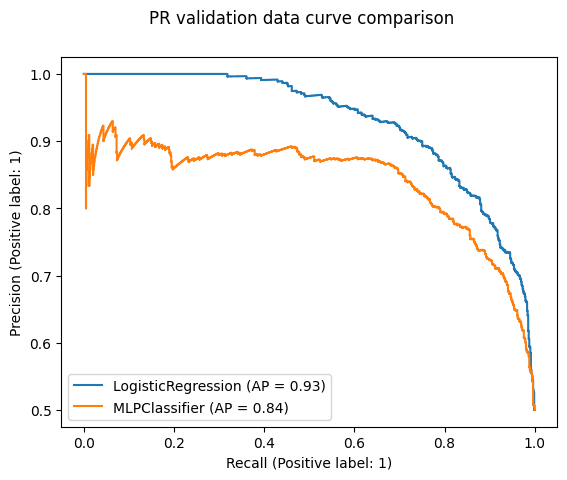

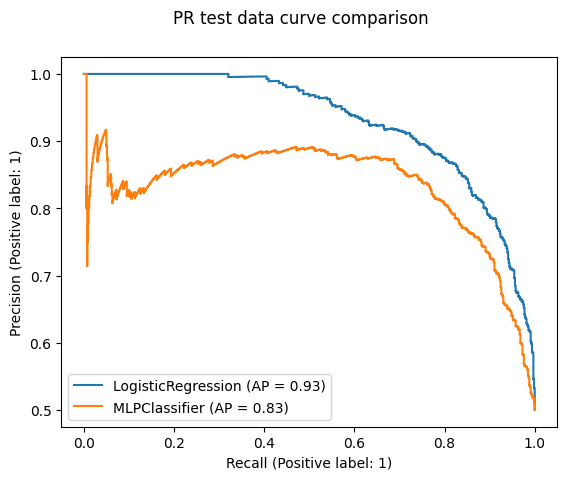

In [36]:
# Plot PR curves
logreg_val_disp = plot_precision_recall_curve(clf_Logreg, X_val, y_val)
mlp_val_disp = plot_precision_recall_curve(clf_best_mlp, X_val, y_val, ax=logreg_val_disp.ax_)
mlp_val_disp.figure_.suptitle("PR validation data curve comparison")
plt.show()

logreg_test_disp = plot_precision_recall_curve(clf_Logreg, X_test, y_test)
mlp_test_disp = plot_precision_recall_curve(clf_best_mlp, X_test, y_test, ax=logreg_test_disp.ax_)
mlp_test_disp.figure_.suptitle("PR test data curve comparison")
plt.show()